# 2) Exploration

Import data from DRUG_TRAIN, DRUG_TEST, DRUG_UNSEEN.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df_train = pd.read_csv("drug_train.csv")
df_test = pd.read_csv("drug_test.csv")
df_unseen = pd.read_csv("drug_unseen.csv")
df_train.drop("ID", axis=1, inplace=True)
df_test.drop("ID", axis=1, inplace=True)
df_unseen.drop("ID", axis=1, inplace=True)
print(df_train.head())
print(df_test.head())
print(df_unseen.head())

   AGE SEX      BP CHOLES        NA         K   DRUG
0   23   F    HIGH   HIGH  0.792535  0.031258  drugY
1   47   M     LOW   HIGH  0.739309  0.056468  drugC
2   47   M     LOW   HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL   HIGH  0.563682  0.072289  drugX
4   61   F     LOW   HIGH  0.559294  0.030998  drugY
   AGE SEX      BP  CHOLES        NA         K   DRUG
0   57   M     LOW  NORMAL  0.536746  0.028061  drugY
1   49   F  NORMAL  NORMAL  0.694689  0.074055  drugX
2   74   M    HIGH    HIGH  0.715337  0.074773  drugB
3   49   M     LOW  NORMAL  0.625889  0.056828  drugX
4   65   F    HIGH  NORMAL  0.828898  0.026004  drugY
   AGE SEX      BP  CHOLES        NA         K  DRUG
0   57   M     LOW  NORMAL  0.536746  0.028061   NaN
1   49   F  NORMAL  NORMAL  0.694689  0.074055   NaN
2   74   M    HIGH    HIGH  0.715337  0.074773   NaN
3   49   M     LOW  NORMAL  0.625889  0.056828   NaN
4   65   F    HIGH  NORMAL  0.828898  0.026004   NaN


## 2.1) What is the number of classes to be classified?

In [ ]:
df_train["DRUG"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

Ans : 5 classes = 'drugY', 'drugX', 'drugB', 'drugA', 'drugC'

## 2.2) What proportion of the patients responded to each class, in the training dataset?

In [ ]:
df_train_percentage = pd.DataFrame()
df_train_percentage["Occurance"] = df_train["DRUG"].value_counts()
df_train_percentage["Percent"] = df_train["DRUG"].value_counts() / len(df_train) * 100
df_train_percentage

,Occurance,Percent
DRUG,,
drugY,91,45.5
drugX,54,27.0
drugA,23,11.5
drugC,16,8.0
drugB,16,8.0


# 3) Pre-processing

## 3.1) Generate Attribute: As an expert in drug design, you know that the concentrations of sodium and potassium in the blood are important factors. The ratio of sodium to potassium seemed to predict when to use drug Y. You should derive a field that contains the value of this ratio for each record. This field might be useful later on, when you build a model to predict when to use each of the five drugs. Create a new field, call it Na_to_K. Create a derived field, Na_to_K, and filter out the original fields, Na and K, so that they are not used twice in the modeling algorithm.

In [ ]:
df_train["NA_to_K"] = df_train["NA"] / df_train["K"]
df_test["NA_to_K"] = df_test["NA"] / df_test["K"]
df_unseen["NA_to_K"] = df_unseen["NA"] / df_unseen["K"]
df_train.drop(["NA", "K"], axis=1, inplace=True)
df_test.drop(["NA", "K"], axis=1, inplace=True)
df_unseen.drop(["NA", "K"], axis=1, inplace=True)
print(df_train)

     AGE SEX      BP  CHOLES   DRUG    NA_to_K
0     23   F    HIGH    HIGH  drugY  25.354629
1     47   M     LOW    HIGH  drugC  13.092530
2     47   M     LOW    HIGH  drugC  10.113556
3     28   F  NORMAL    HIGH  drugX   7.797618
4     61   F     LOW    HIGH  drugY  18.042906
5     22   F  NORMAL    HIGH  drugX   8.606825
6     49   F  NORMAL    HIGH  drugY  16.275135
7     41   M     LOW    HIGH  drugC  11.036913
8     60   M  NORMAL    HIGH  drugY  15.170896
9     43   M     LOW  NORMAL  drugY  19.367619
10    47   F     LOW    HIGH  drugC  11.767450
11    34   F    HIGH  NORMAL  drugY  19.198867
12    43   M     LOW    HIGH  drugY  15.376405
13    74   F     LOW    HIGH  drugY  20.941957
14    50   F  NORMAL    HIGH  drugX  12.702636
15    16   F    HIGH  NORMAL  drugY  15.515556
16    69   M     LOW  NORMAL  drugX  11.455088
17    43   M    HIGH    HIGH  drugA  13.971583
18    23   M     LOW    HIGH  drugC   7.297576
19    32   F    HIGH  NORMAL  drugY  25.974044
20    57   M 

## 3.2) Discretization: Discretize Na_to_K in to the following rages: Low: <= 10; Medium: <= 20; High: <= 30; VeryHigh: <= 40

In [ ]:
# Low = 0 Medium = 1 High = 2 VeryHigh = 3

func = lambda x: "Low" if x <= 10 else ("Meidum" if x <= 20 else ("High" if x <= 30 else "Very High"))

df_train["NA_to_K"] = df_train["NA_to_K"].apply(func)
df_test["NA_to_K"] = df_test["NA_to_K"].apply(func)
df_unseen["NA_to_K"] = df_unseen["NA_to_K"].apply(func)

# one hot encoding

one_hot_lst = ["BP", "CHOLES", "NA_to_K","SEX"]

df_train = pd.get_dummies(df_train, columns=one_hot_lst)
df_test = pd.get_dummies(df_test, columns=one_hot_lst)
df_unseen = pd.get_dummies(df_unseen, columns=one_hot_lst)

df_train.head()

,AGE,DRUG,BP_HIGH,BP_LOW,BP_NORMAL,CHOLES_HIGH,CHOLES_NORMAL,NA_to_K_High,NA_to_K_Low,NA_to_K_Meidum,NA_to_K_Very High,SEX_F,SEX_M
0,23,drugY,True,False,False,True,False,True,False,False,False,True,False
1,47,drugC,False,True,False,True,False,False,False,True,False,False,True
2,47,drugC,False,True,False,True,False,False,False,True,False,False,True
3,28,drugX,False,False,True,True,False,False,True,False,False,True,False
4,61,drugY,False,True,False,True,False,False,False,True,False,True,False


# 4) Model Construction
Build a Classifier using Decision Trees with the following parameters: Maximal depth = 3, Criterion = Information-Gain

## 4.1) What is the number of levels in your tree?

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0) # entropy = information-gain
x_train = df_train.drop("DRUG", axis=1)
y_train = df_train["DRUG"]
clf.fit(x_train,y_train)
print(clf.tree_.max_depth)

3


[Text(0.4583333333333333, 0.875, 'BP_HIGH <= 0.5\nentropy = 1.969\nsamples = 200\nvalue = [23, 16, 16, 54, 91]'),
 Text(0.25, 0.625, 'NA_to_K_High <= 0.5\nentropy = 1.428\nsamples = 123\nvalue = [0, 0, 16, 54, 53]'),
 Text(0.16666666666666666, 0.375, 'BP_LOW <= 0.5\nentropy = 1.43\nsamples = 102\nvalue = [0, 0, 16, 54, 32]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.855\nsamples = 50\nvalue = [0, 0, 0, 36, 14]'),
 Text(0.25, 0.125, 'entropy = 1.583\nsamples = 52\nvalue = [0, 0, 16, 18, 18]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 0, 0, 21]'),
 Text(0.6666666666666666, 0.625, 'AGE <= 50.5\nentropy = 1.495\nsamples = 77\nvalue = [23, 16, 0, 0, 38]'),
 Text(0.5, 0.375, 'NA_to_K_High <= 0.5\nentropy = 0.995\nsamples = 50\nvalue = [23, 0, 0, 0, 27]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.977\nsamples = 39\nvalue = [23, 0, 0, 0, 16]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 0, 11]'),
 Text(0.8333

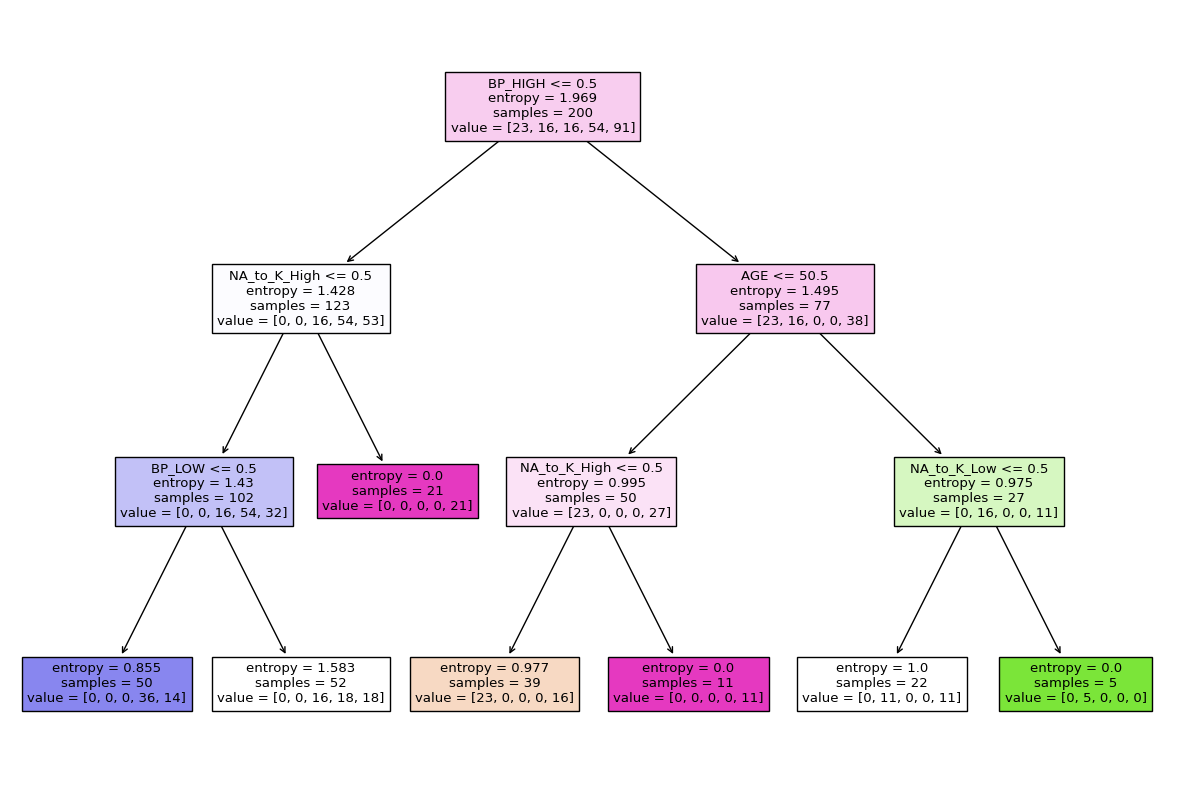

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=x_train.columns)

## 4.2) Express the resulting tree as a set of rules.

In [ ]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=list(x_train.columns))
print(r)

|--- BP_HIGH <= 0.50
|   |--- NA_to_K_High <= 0.50
|   |   |--- BP_LOW <= 0.50
|   |   |   |--- class: drugX
|   |   |--- BP_LOW >  0.50
|   |   |   |--- class: drugX
|   |--- NA_to_K_High >  0.50
|   |   |--- class: drugY
|--- BP_HIGH >  0.50
|   |--- AGE <= 50.50
|   |   |--- NA_to_K_High <= 0.50
|   |   |   |--- class: drugA
|   |   |--- NA_to_K_High >  0.50
|   |   |   |--- class: drugY
|   |--- AGE >  50.50
|   |   |--- NA_to_K_Low <= 0.50
|   |   |   |--- class: drugB
|   |   |--- NA_to_K_Low >  0.50
|   |   |   |--- class: drugB



## 4.3) Which attribute is the most related to Drug

In [52]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, x_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature BP_HIGH (0.385241)
2. feature AGE (0.172618)
3. feature NA_to_K_High (0.154865)
4. feature CHOLES_HIGH (0.129263)
5. feature BP_LOW (0.077523)
6. feature NA_to_K_Low (0.057781)
7. feature NA_to_K_Meidum (0.022708)
8. feature SEX_M (0.000000)
9. feature SEX_F (0.000000)
10. feature NA_to_K_Very High (0.000000)
11. feature CHOLES_NORMAL (0.000000)
12. feature BP_NORMAL (0.000000)


Answer : BP_HIGH -> BP because importance value from model Decision Tree has the highest value

# 5) Performance evaluation

## 5.1) What is the overall accuracy/error of your model against the testing set?


In [ ]:
x_test = df_test.drop("DRUG", axis=1)
y_test = df_test["DRUG"]
clf.score(x_test, y_test)

0.7142857142857143

## 5.2) Give precision/recall of each class?

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         2
       drugB       0.75      1.00      0.86         3
       drugC       0.00      0.00      0.00         2
       drugX       0.57      1.00      0.73         4
       drugY       1.00      0.33      0.50         3

    accuracy                           0.71        14
   macro avg       0.66      0.67      0.62        14
weighted avg       0.68      0.71      0.64        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6) Propose your best model

In [ ]:
from time import sleep
for i in range(3,11):
    print(f"max depth = {i}")
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=0)
    clf.fit(x_train,y_train)
    print(clf.score(x_test, y_test))
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------\n")
    sleep(1)

max depth = 3
0.7142857142857143
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         2
       drugB       0.75      1.00      0.86         3
       drugC       0.00      0.00      0.00         2
       drugX       0.57      1.00      0.73         4
       drugY       1.00      0.33      0.50         3

    accuracy                           0.71        14
   macro avg       0.66      0.67      0.62        14
weighted avg       0.68      0.71      0.64        14

--------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max depth = 4
0.9285714285714286
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         2
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       0.80      1.00      0.89         4
       drugY       1.00      0.67      0.80         3

    accuracy                           0.93        14
   macro avg       0.96      0.93      0.94        14
weighted avg       0.94      0.93      0.93        14

--------------------------------------------

max depth = 5
0.9285714285714286
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         2
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       0.80      1.00      0.89         4
       drugY       1.00      0.67      0.80         3

    accuracy                           0.93        14
   macro avg       

Select Max Depth = 4
accuracy : 0.9285714285714286

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=0)
clf.fit(x_train,y_train)
print(clf.score(x_test, y_test))
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

0.9285714285714286
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         2
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       0.80      1.00      0.89         4
       drugY       1.00      0.67      0.80         3

    accuracy                           0.93        14
   macro avg       0.96      0.93      0.94        14
weighted avg       0.94      0.93      0.93        14



# 7) Prediction of Unseen

In [ ]:
x_unseen = df_unseen.drop("DRUG", axis=1)
df_unseen["DRUG"] =  clf.predict(x_unseen)
cols = list(df_unseen.columns)
a, b = cols.index('DRUG'), cols.index(cols[-1])
cols[b], cols[a] = cols[a], cols[b]
df_unseen = df_unseen[cols]
df_unseen

,AGE,SEX_M,BP_HIGH,BP_LOW,BP_NORMAL,CHOLES_HIGH,CHOLES_NORMAL,NA_to_K_High,NA_to_K_Low,NA_to_K_Meidum,NA_to_K_Very High,SEX_F,DRUG
0,57,True,False,True,False,False,True,False,False,True,False,False,drugX
1,49,False,False,False,True,False,True,False,True,False,False,True,drugX
2,74,True,True,False,False,True,False,False,True,False,False,False,drugB
3,49,True,False,True,False,False,True,False,False,True,False,False,drugX
4,65,False,True,False,False,False,True,False,False,False,True,True,drugY
5,53,True,False,False,True,True,False,False,False,True,False,False,drugX
6,32,True,True,False,False,False,True,False,True,False,False,False,drugA
7,68,True,False,True,False,True,False,False,False,True,False,False,drugC
8,68,False,True,False,False,False,True,False,False,True,False,True,drugB
9,26,False,False,True,False,True,False,False,False,True,False,True,drugC
